In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [32]:

df = pd.read_csv("/kaggle/input/titanic/titanic.csv") # чтение csv-файла

In [33]:
# 1. Анализ Данных

print("Информация о датасете:")
print(df.info())
print("\nПервые 5 строк:")
print(df.head())

print("\nПропущенные значения:")
print(df.isnull().sum())


Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Первые 5 строк:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5     

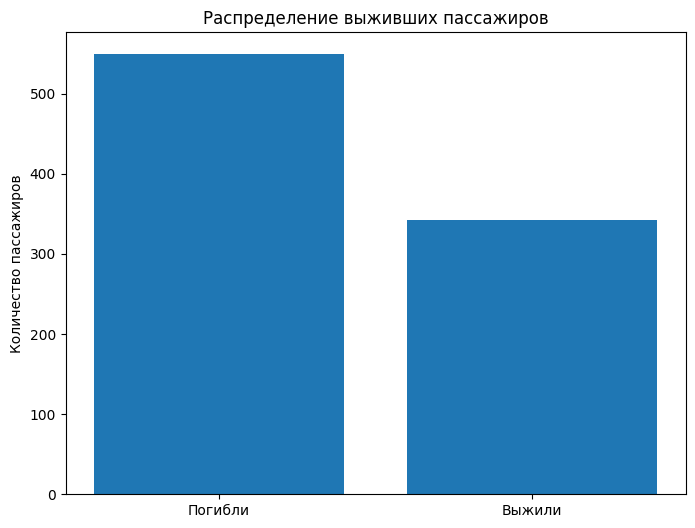

In [34]:
# визуализация 1: распределение выживших
plt.figure(figsize=(8, 6))
survived_counts = df['Survived'].value_counts()
plt.bar(['Погибли', 'Выжили'], survived_counts.values)
plt.title('Распределение выживших пассажиров')
plt.ylabel('Количество пассажиров')
plt.show()


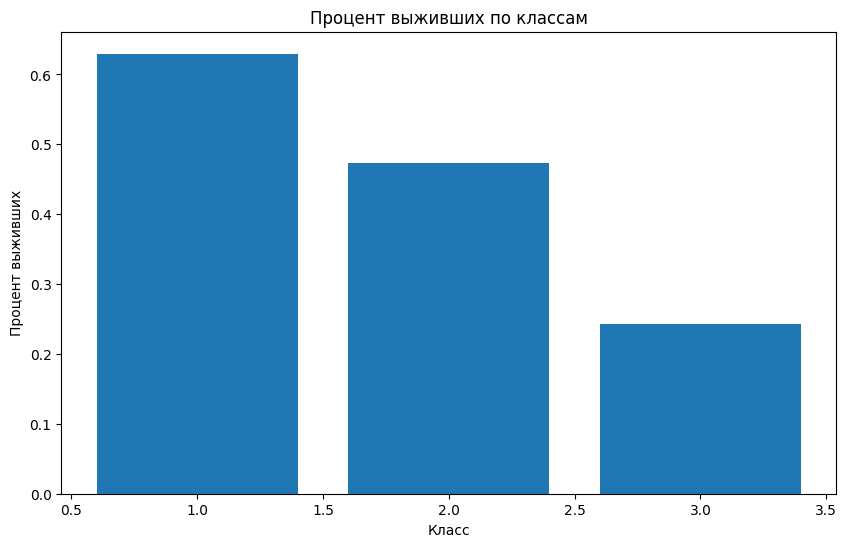

In [35]:
# визуализация 2: выживаемость по классам
plt.figure(figsize=(10, 6))
survival_by_class = df.groupby('Pclass')['Survived'].mean()
plt.bar(survival_by_class.index, survival_by_class.values)
plt.title('Процент выживших по классам')
plt.xlabel('Класс')
plt.ylabel('Процент выживших')
plt.show()


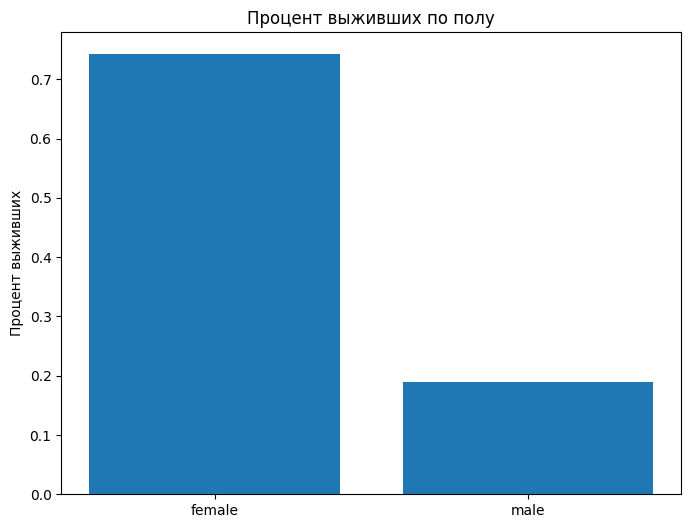

In [36]:
# визуализация 3: выживаемость по полу
plt.figure(figsize=(8, 6))
survival_by_sex = df.groupby('Sex')['Survived'].mean()
plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.title('Процент выживших по полу')
plt.ylabel('Процент выживших')
plt.show()

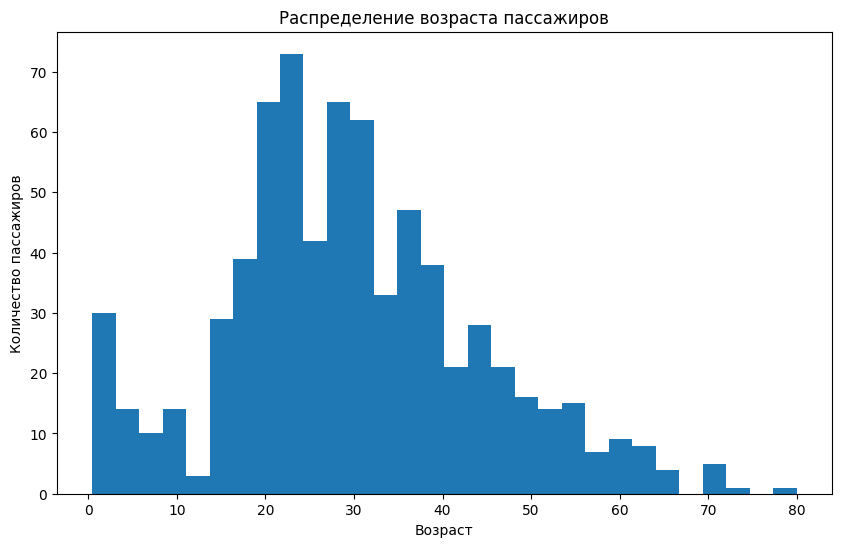

In [37]:
# визуализация 4: распределение возраста
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Распределение возраста пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

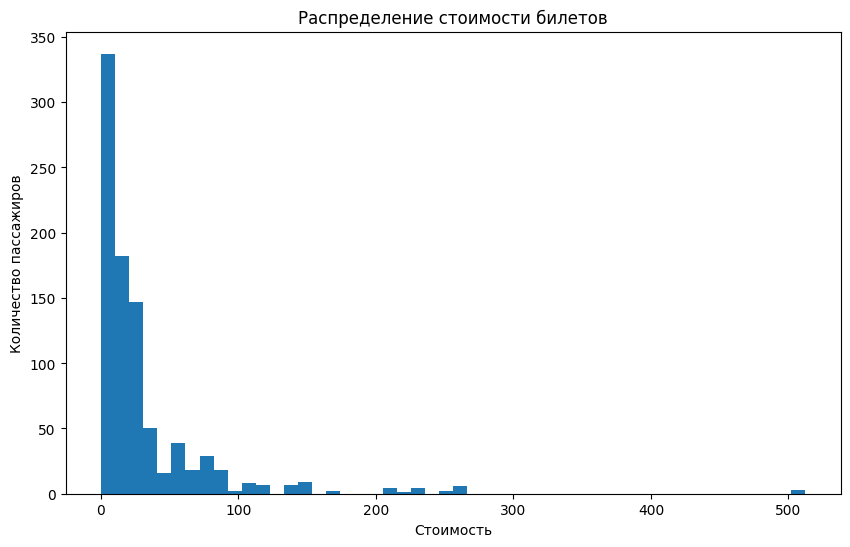

In [38]:
# визуализация 5: распределение стоимости билетов
plt.figure(figsize=(10, 6))
plt.hist(df['Fare'].dropna(), bins=50)
plt.title('Распределение стоимости билетов')
plt.xlabel('Стоимость')
plt.ylabel('Количество пассажиров')
plt.show()

In [39]:
# 2. Feature Engineering

df_processed = df.copy()

# обработка пропущенных значений
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)

# размер семьи
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

# путешествует ли один
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# возрастные группы
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], 
                                bins=[0, 18, 35, 50, 100], 
                                labels=['Child', 'Young', 'Middle', 'Elder'])

# категории стоимости билетов
df_processed['FareCategory'] = pd.qcut(df_processed['Fare'], 
                                     q=4, 
                                     labels=['Low', 'Medium', 'High', 'Very High'])

# пол
df_processed['Sex'] = df_processed['Sex'].map({'female': 1, 'male': 0})

# порт посадки
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df_processed['Embarked'] = df_processed['Embarked'].map(embarked_mapping)

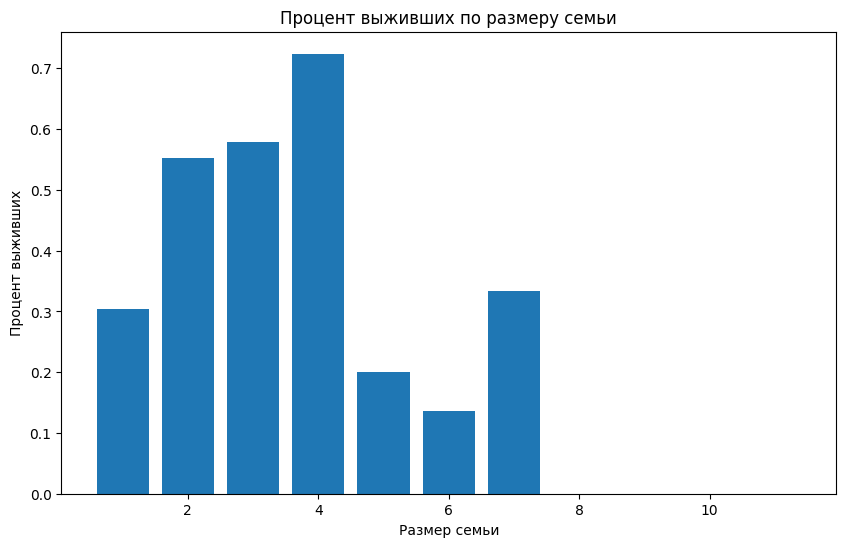

In [49]:
# выживаемость по размеру семьи
plt.figure(figsize=(10, 6))
survival_by_family = df_processed.groupby('FamilySize')['Survived'].mean()
plt.bar(survival_by_family.index, survival_by_family.values)
plt.title('Процент выживших по размеру семьи')
plt.xlabel('Размер семьи')
plt.ylabel('Процент выживших')
plt.show()

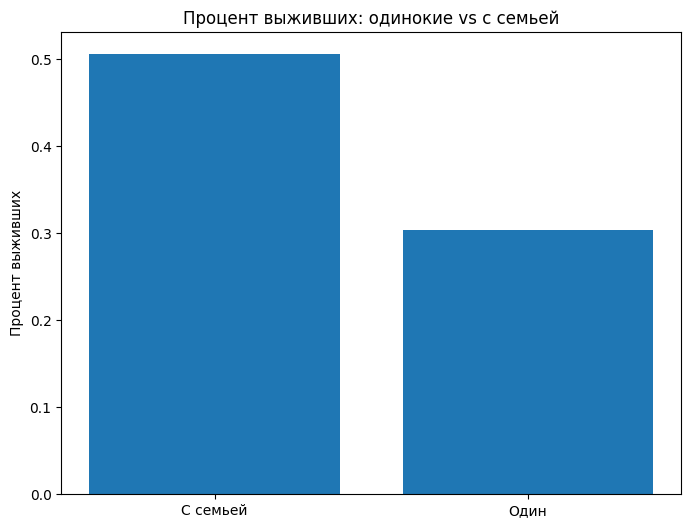

In [50]:
# выживаемость одиноких пассажиров
plt.figure(figsize=(8, 6))
survival_by_alone = df_processed.groupby('IsAlone')['Survived'].mean()
plt.bar(['С семьей', 'Один'], survival_by_alone.values)
plt.title('Процент выживших: одинокие vs с семьей')
plt.ylabel('Процент выживших')
plt.show()

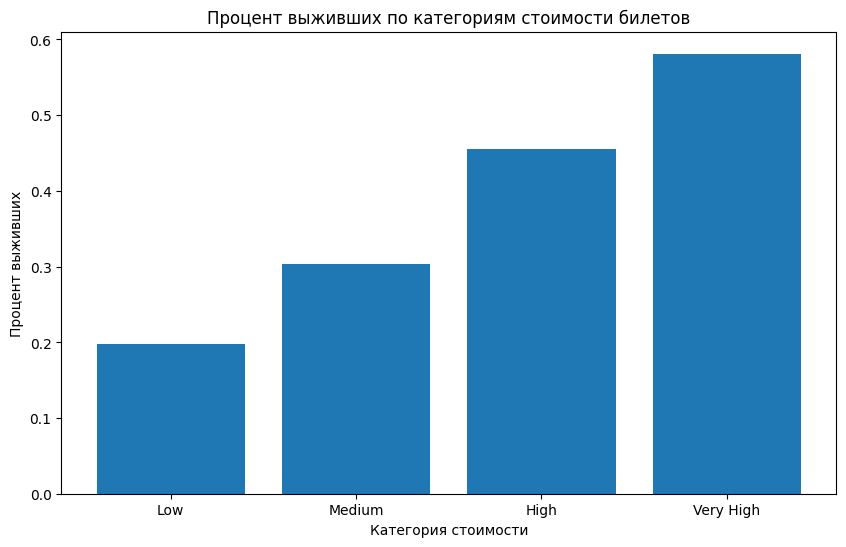

In [51]:
# выживаемость по категориям стоимости билетов
plt.figure(figsize=(10, 6))
survival_by_fare = df_processed.groupby('FareCategory')['Survived'].mean()
plt.bar(survival_by_fare.index, survival_by_fare.values)
plt.title('Процент выживших по категориям стоимости билетов')
plt.xlabel('Категория стоимости')
plt.ylabel('Процент выживших')
plt.show()

In [52]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked']
X = df_processed[features]
y = df_processed['Survived']


In [53]:
# нормализация числовых признаков
for column in ['Age', 'Fare', 'FamilySize']:
    X[column] = (X[column] - X[column].mean()) / X[column].std()

print("\nПодготовленные данные для моделирования:")
print(X.head())


Подготовленные данные для моделирования:
   Pclass  Sex       Age      Fare  FamilySize  IsAlone  Embarked
0       3  NaN -0.565419 -0.502163    0.059127        0       0.0
1       1  NaN  0.663488  0.786404    0.059127        0       1.0
2       3  NaN -0.258192 -0.488580   -0.560660        1       0.0
3       1  NaN  0.433068  0.420494    0.059127        0       0.0
4       3  NaN  0.433068 -0.486064   -0.560660        1       0.0


In [54]:
# 3. Моделирование

def train_test_split(X, y, test_size=0.2, random_state=42):
    """ разделение данных на тренировочную и тестовую выборки """
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted > 0.5).astype(int)


def calculate_metrics(y_true, y_pred):
    """ расчёт метрик """    

    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': {
            'tn': tn, 'fp': fp,
            'fn': fn, 'tp': tp
        }
    }

def cross_validation(X, y, k_folds=3):    
    fold_size = len(X) // k_folds
    indices = np.random.permutation(len(X))
    metrics_per_fold = []
    
    for fold in range(k_folds):
        start_idx = fold * fold_size
        end_idx = (fold + 1) * fold_size if fold < k_folds - 1 else len(X)
        
        test_indices = indices[start_idx:end_idx]
        train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        X_train = X.iloc[train_indices]
        X_test = X.iloc[test_indices]
        y_train = y.iloc[train_indices]
        y_test = y.iloc[test_indices]
        
        model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
        model.fit(X_train.values, y_train.values)
        predictions = model.predict(X_test.values)
        
        metrics = calculate_metrics(y_test.values, predictions)
        metrics_per_fold.append(metrics)
        
        print(f"\nРезультаты для fold {fold + 1}:")
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"F1 Score: {metrics['f1']:.4f}")
        print("\nConfusion Matrix:")
        print(f"True Negative: {metrics['confusion_matrix']['tn']}")
        print(f"False Positive: {metrics['confusion_matrix']['fp']}")
        print(f"False Negative: {metrics['confusion_matrix']['fn']}")
        print(f"True Positive: {metrics['confusion_matrix']['tp']}")
        
    return metrics_per_fold

print("\nЗапуск кросс-валидации:")
metrics_results = cross_validation(X, y, k_folds=3)



Запуск кросс-валидации:

Результаты для fold 1:
Accuracy: 0.6195
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
True Negative: 184
False Positive: 0
False Negative: 113
True Positive: 0

Результаты для fold 2:
Accuracy: 0.6532
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
True Negative: 194
False Positive: 0
False Negative: 103
True Positive: 0

Результаты для fold 3:
Accuracy: 0.5758
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000

Confusion Matrix:
True Negative: 171
False Positive: 0
False Negative: 126
True Positive: 0



Средние метрики по всем фолдам:
Accuracy: 0.6162
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


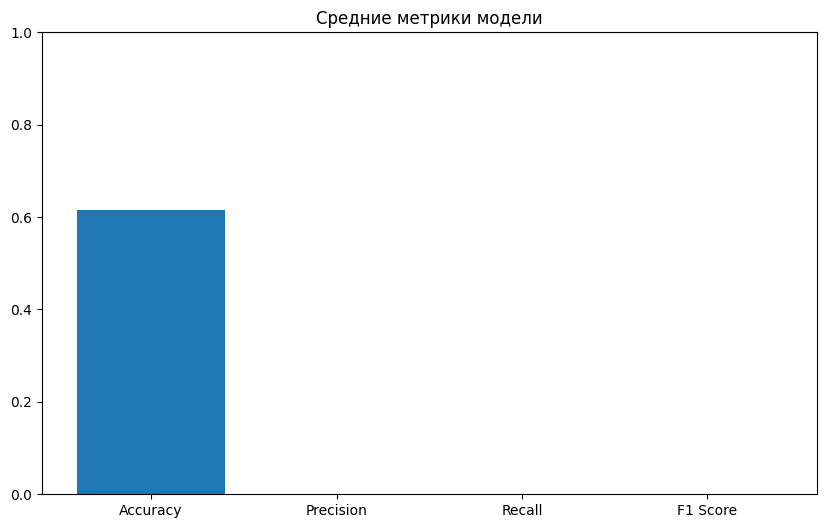

In [55]:
# вычисление средних метрик по всем фолдам
avg_metrics = {
    'accuracy': np.mean([m['accuracy'] for m in metrics_results]),
    'precision': np.mean([m['precision'] for m in metrics_results]),
    'recall': np.mean([m['recall'] for m in metrics_results]),
    'f1': np.mean([m['f1'] for m in metrics_results])
}

print("\nСредние метрики по всем фолдам:")
print(f"Accuracy: {avg_metrics['accuracy']:.4f}")
print(f"Precision: {avg_metrics['precision']:.4f}")
print(f"Recall: {avg_metrics['recall']:.4f}")
print(f"F1 Score: {avg_metrics['f1']:.4f}")

plt.figure(figsize=(10, 6))
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [avg_metrics['accuracy'], avg_metrics['precision'], 
                 avg_metrics['recall'], avg_metrics['f1']]

plt.bar(metrics_names, metrics_values)
plt.title('Средние метрики модели')
plt.ylim(0, 1)
plt.show()

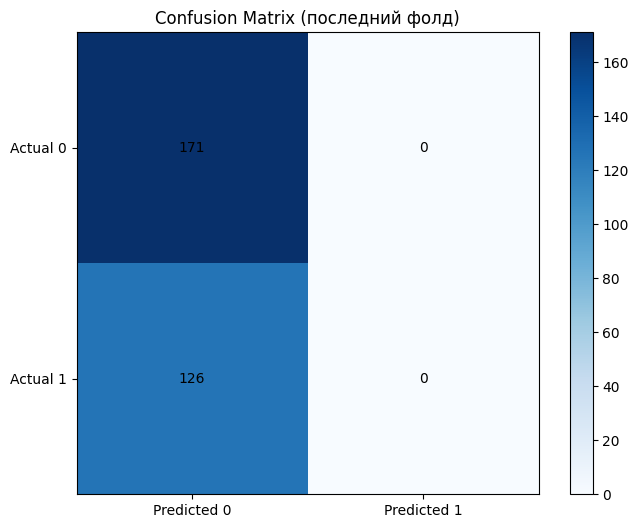

In [56]:
# визуализация confusion matrix для последнего фолда
plt.figure(figsize=(8, 6))
cm = metrics_results[-1]['confusion_matrix']
cm_matrix = [[cm['tn'], cm['fp']], [cm['fn'], cm['tp']]]
plt.imshow(cm_matrix, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (последний фолд)')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm_matrix[i][j]), 
                ha='center', va='center')

plt.show()

In [57]:
print("\nИтоговые выводы:")
print(f"1. Модель правильно предсказала, что пассажир выживет (True Positive): {cm['tp']} случаев")
print(f"2. Модель правильно предсказала, что пассажир погибнет (True Negative): {cm['tn']} случаев")
print(f"3. Модель ошибочно предсказала выживание (False Positive): {cm['fp']} случаев")
print(f"4. Модель ошибочно предсказала гибель (False Negative): {cm['fn']} случаев")
print(f"\nОбщая точность модели (accuracy): {avg_metrics['accuracy']:.4f}")
print(f"Точность предсказания выживших (precision): {avg_metrics['precision']:.4f}")
print(f"Полнота предсказания выживших (recall): {avg_metrics['recall']:.4f}")
print(f"F1-мера: {avg_metrics['f1']:.4f}")


Итоговые выводы:
1. Модель правильно предсказала, что пассажир выживет (True Positive): 0 случаев
2. Модель правильно предсказала, что пассажир погибнет (True Negative): 171 случаев
3. Модель ошибочно предсказала выживание (False Positive): 0 случаев
4. Модель ошибочно предсказала гибель (False Negative): 126 случаев

Общая точность модели (accuracy): 0.6162
Точность предсказания выживших (precision): 0.0000
Полнота предсказания выживших (recall): 0.0000
F1-мера: 0.0000
